In [1]:
#load the libraries :

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1st step - Read & Describe the dataset

In [2]:
df = pd.read_csv ('Data Set/shopping_trends.csv',index_col=0)

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3900.0,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Purchase Amount (USD),3900.0,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Review Rating,3900.0,3.749949,0.716223,2.5,3.1,3.7,4.4,5.0
Previous Purchases,3900.0,25.351538,14.447125,1.0,13.0,25.0,38.0,50.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 1 to 3900
Data columns (total 18 columns):
Age                         3900 non-null int64
Gender                      3900 non-null object
Item Purchased              3900 non-null object
Category                    3900 non-null object
Purchase Amount (USD)       3900 non-null int64
Location                    3900 non-null object
Size                        3900 non-null object
Color                       3900 non-null object
Season                      3900 non-null object
Review Rating               3900 non-null float64
Subscription Status         3900 non-null object
Payment Method              3900 non-null object
Shipping Type               3900 non-null object
Discount Applied            3900 non-null object
Promo Code Used             3900 non-null object
Previous Purchases          3900 non-null int64
Preferred Payment Method    3900 non-null object
Frequency of Purchases      3900 non-null object
dtypes: float

In [5]:
df.duplicated().sum()

0

In [6]:
df.columns

Index(['Age', 'Gender', 'Item Purchased', 'Category', 'Purchase Amount (USD)',
       'Location', 'Size', 'Color', 'Season', 'Review Rating',
       'Subscription Status', 'Payment Method', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Preferred Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [8]:
# rename the columns.
df_c1 = df.rename({'Item Purchased':"items",'Purchase Amount (USD)':'Amount_USSD','Payment Method':'pay_method','Review Rating':'Rating','Subscription Status':'Subscription','Shipping Type':'shipping_type','Discount Applied':'Discount','Promo Code Used': 'promo_code','Previous Purchases':'Prev_purchases','Frequency of Purchases':'purchases_freq.', 'Preferred Payment Method':'pref.pay_method'}, axis=1)
df_c1.sample(10)

,Age,Gender,items,Category,Amount_USSD,Location,Size,Color,Season,Rating,Subscription,pay_method,shipping_type,Discount,promo_code,Prev_purchases,pref.pay_method,purchases_freq.
Customer ID,,,,,,,,,,,,,,,,,,
3592,48,Female,Jacket,Outerwear,89,South Dakota,M,Gold,Winter,3.2,No,Cash,2-Day Shipping,No,No,38,Bank Transfer,Quarterly
3525,69,Female,Pants,Clothing,74,Michigan,L,Silver,Summer,2.9,No,Credit Card,Free Shipping,No,No,30,Credit Card,Monthly
232,28,Male,Blouse,Clothing,26,Tennessee,M,Blue,Spring,3.1,Yes,Bank Transfer,2-Day Shipping,Yes,Yes,18,Debit Card,Every 3 Months
2316,69,Male,Socks,Clothing,79,Vermont,M,Indigo,Winter,3.5,No,Cash,2-Day Shipping,No,No,49,Debit Card,Quarterly
1476,44,Male,Blouse,Clothing,61,Rhode Island,M,Teal,Spring,4.0,No,Bank Transfer,Express,Yes,Yes,24,Cash,Monthly
916,31,Male,Dress,Clothing,22,Rhode Island,L,Purple,Winter,2.9,Yes,Debit Card,Store Pickup,Yes,Yes,33,Credit Card,Fortnightly
2962,33,Female,Hoodie,Clothing,43,New Hampshire,S,Gold,Fall,2.8,No,Credit Card,Free Shipping,No,No,21,Debit Card,Bi-Weekly
3787,31,Female,Boots,Footwear,47,Tennessee,L,Yellow,Fall,3.6,No,Venmo,2-Day Shipping,No,No,22,Venmo,Weekly
820,55,Male,Sunglasses,Accessories,36,Colorado,S,Teal,Winter,4.8,Yes,Bank Transfer,Next Day Air,Yes,Yes,28,Debit Card,Quarterly


In [38]:
df_c1['purchases_freq.'] = df_c1['purchases_freq.'].replace (to_replace='Every 3 Months', value= 'Quarterly')
df_c1['purchases_freq.'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly'], dtype=object)

In [39]:
df_c1.shipping_type.unique()

array(['Express', 'Free Shipping', 'Next Day Air', 'Standard',
       '2-Day Shipping', 'Store Pickup'], dtype=object)

# Univariate Analysis on numerical columns

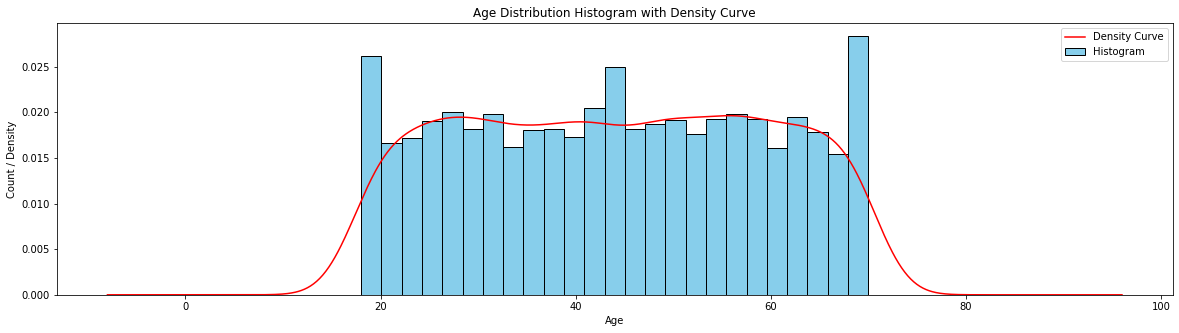

In [40]:
fig,ax= plt.subplots(figsize = (20, 5))
ax.hist(df_c1['Age'], bins =25, edgecolor = 'black',color = 'skyblue',density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

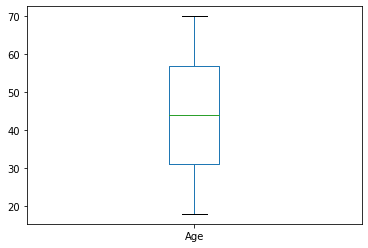

In [41]:
df_c1['Age'].plot(kind="box")

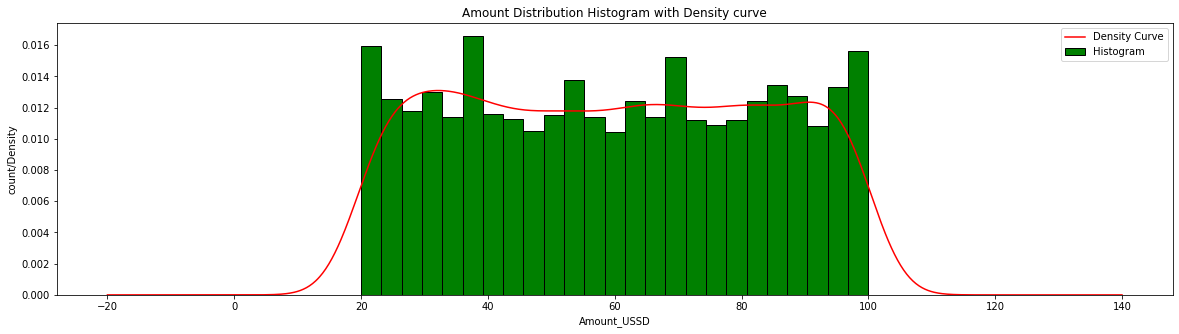

In [42]:
fig1,ay= plt.subplots(figsize=(20,5))
ay.hist(df_c1['Amount_USSD'],bins=25,color = 'green',edgecolor ='black',density = True)
df_c1['Amount_USSD'].plot(kind='kde',color ='red')

ay.set_xlabel('Amount_USSD')
ay.set_ylabel('count/Density')
ay.set_title('Amount Distribution Histogram with Density curve')
ay.legend(['Density Curve', 'Histogram'])
plt.show()

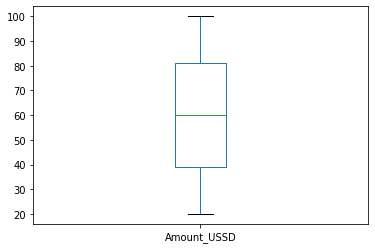

In [43]:
df_c1['Amount_USSD'].plot(kind="box")

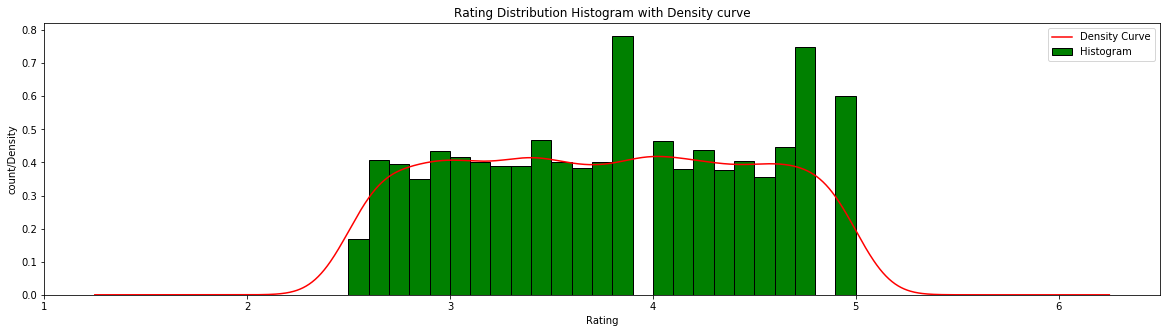

In [52]:
fig1,az= plt.subplots(figsize=(20,5))
az.hist(df_c1['Rating'],bins=25,color = 'green',edgecolor ='black',density = True)
df_c1['Rating'].plot(kind='kde',color ='red')

az.set_xlabel('Rating')
az.set_ylabel('count/Density')
az.set_title('Rating Distribution Histogram with Density curve')
az.legend(['Density Curve', 'Histogram'])
plt.show()

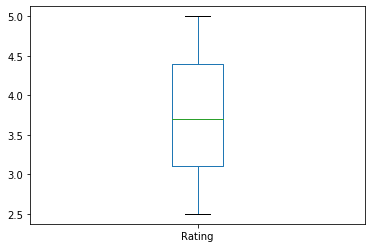

In [53]:
df_c1['Rating'].plot(kind="box")

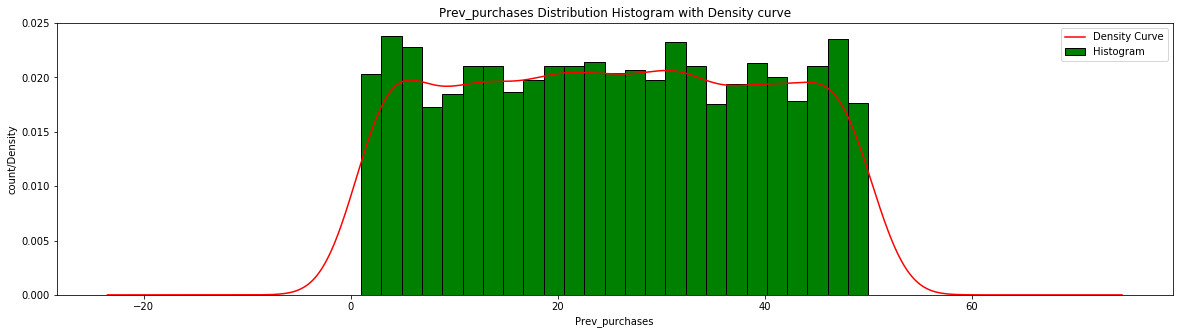

In [59]:
fig1,az1= plt.subplots(figsize=(20,5))
az1.hist(df_c1['Prev_purchases'],bins=25,color = 'green',edgecolor ='black',density = True)
df_c1['Prev_purchases'].plot(kind='kde',color ='red')

az1.set_xlabel('Prev_purchases')
az1.set_ylabel('count/Density')
az1.set_title('Prev_purchases Distribution Histogram with Density curve')
az1.legend(['Density Curve', 'Histogram'])
plt.show()

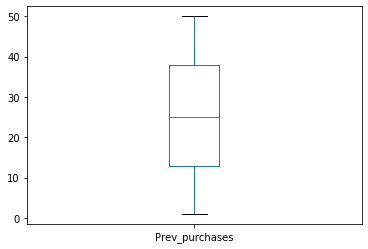

In [60]:
df_c1['Prev_purchases'].plot(kind="box")

 Hence from aove visulisation, following are the observations : 
 
 1) All the numerical data coloumns is almost normally distributed(symmetrical distribution)
 
 2) No outliers present
 
 3) No missing values

#  Univariate Analysis on categorical columns

In [61]:
df_c1['Gender'].value_counts() 

Male      2652
Female    1248
Name: Gender, dtype: int64

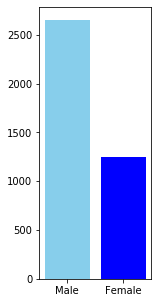

In [69]:
gender_counts = df_c1['Gender'].value_counts()
gender = gender_counts.index
count = gender_counts.values
plt.figure(figsize=(2,5))
plt.bar(gender, count, color=['skyblue', 'blue'])
plt.show()

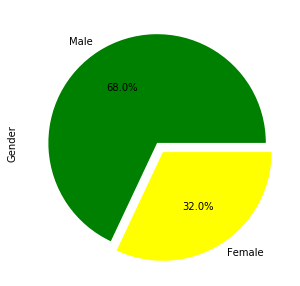

In [70]:
plt.figure(figsize=(20,5))
df_c1['Gender'].value_counts().plot(kind ='pie',explode=(0, 0.1), autopct='%0.1f%%', colors=['green', 'yellow'])
plt.show()

In [67]:
df_c1['items'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Sunglasses    161
Belt          161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: items, dtype: int64

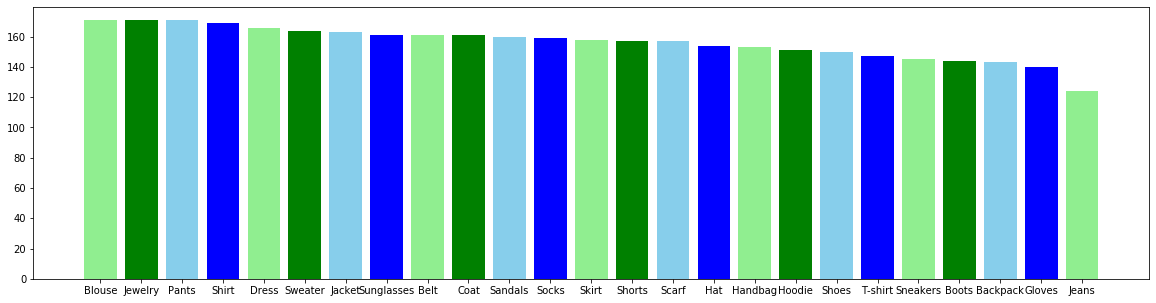

In [71]:
Item_counts = df_c1['items'].value_counts()
items = Item_counts.index
count = Item_counts.values
plt.figure(figsize=(20,5))
plt.bar(items, count,color=['lightgreen', 'green', 'skyblue', 'blue'])
plt.show()

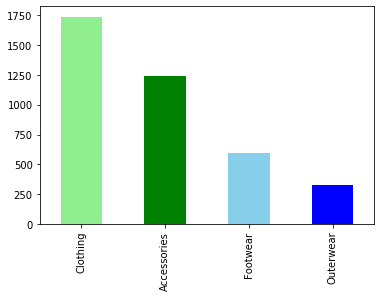

In [72]:
df_c1['Category'].value_counts().plot(kind='bar', color=['lightgreen', 'green', 'skyblue', 'blue'])
plt.show()

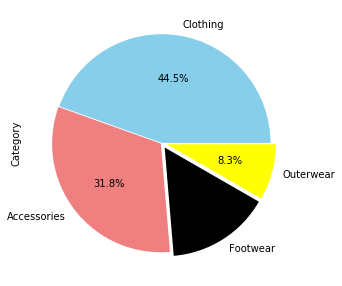

In [73]:
plt.figure(figsize=(20,5))
df_c1['Category'].value_counts().plot(kind ='pie', explode=(0,0.01,0.05,0.05), autopct='%0.1f%%', colors=['skyblue', 'lightcoral', 'black', 'yellow'])
plt.show()

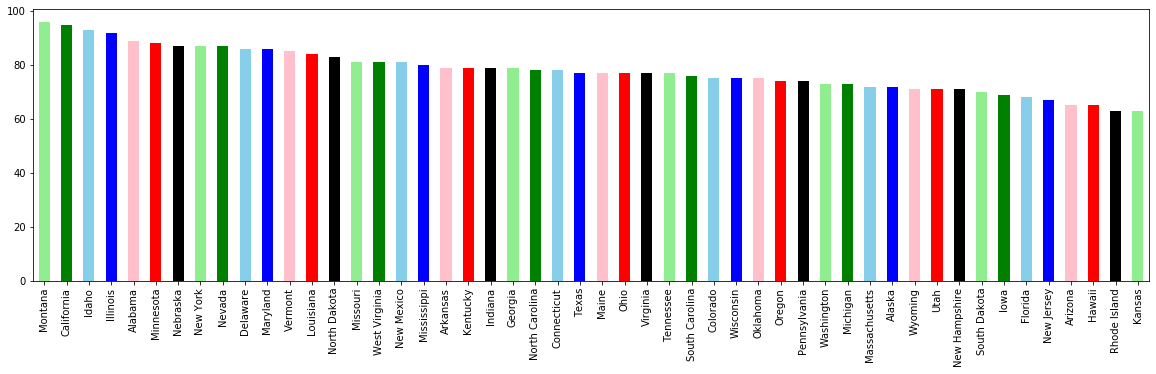

In [74]:
plt.figure(figsize=(20,5))
df_c1['Location'].value_counts().plot(kind='bar', color=['lightgreen', 'green', 'skyblue', 'blue', 'pink', 'red', 'black'])
plt.show()

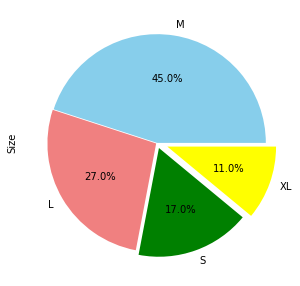

In [75]:
plt.figure(figsize=(20,5))
df_c1['Size'].value_counts().plot(kind ='pie',explode = (0,0.01,0.05,0.1),autopct='%0.1f%%', colors=['skyblue', 'lightcoral', 'green', 'yellow'])
plt.show()

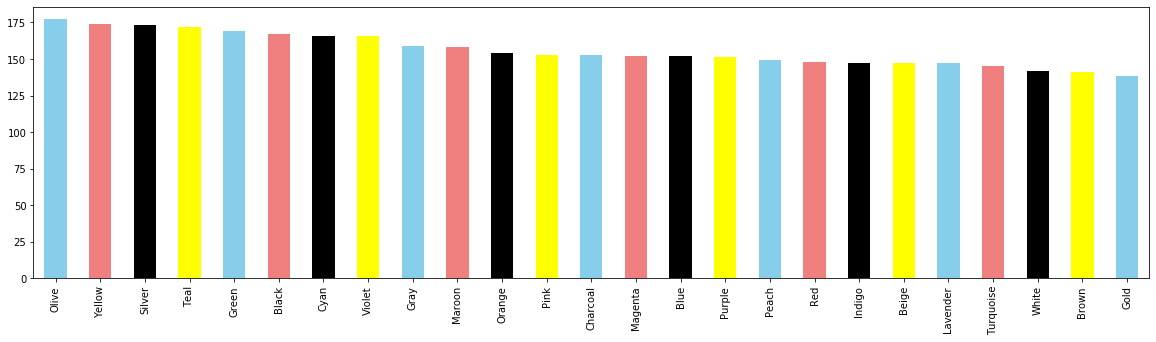

In [76]:
plt.figure(figsize=(20,5))
df_c1['Color'].value_counts().plot(kind ='bar', color=['skyblue', 'lightcoral', 'black', 'yellow'])
plt.show()

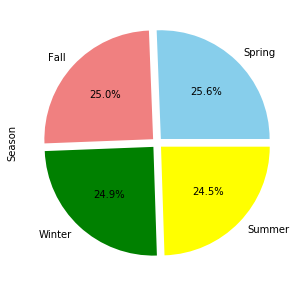

In [77]:
plt.figure(figsize=(20,5))
df_c1['Season'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.05,0.05,0.05,0.05) ,colors=['skyblue', 'lightcoral', 'green', 'yellow'])
plt.show()

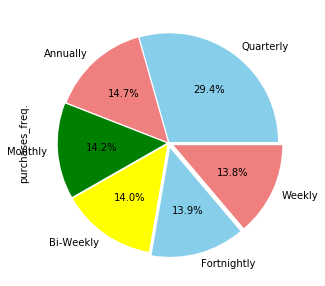

In [79]:
plt.figure(figsize=(20,5))
df_c1['purchases_freq.'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.01,0.02,0.02,0.05,0.05) ,colors=['skyblue', 'lightcoral', 'green', 'yellow'])
plt.show()

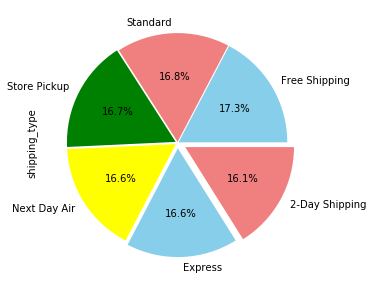

In [81]:
plt.figure(figsize=(20,5))
df_c1['shipping_type'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.01,0.02,0.02,0.05,0.08) ,colors=['skyblue', 'lightcoral', 'green', 'yellow'])
plt.show()

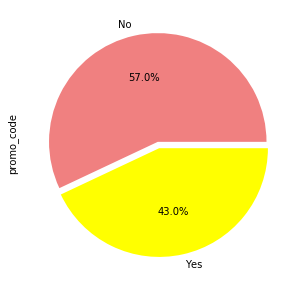

In [84]:
plt.figure(figsize=(20,5))
df_c1['promo_code'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.05) ,colors=['lightcoral','yellow'])
plt.show()

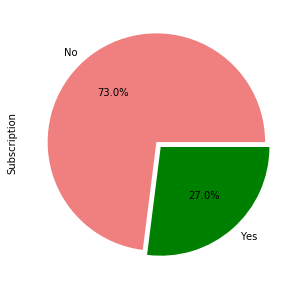

In [85]:
plt.figure(figsize=(20,5))
df_c1['Subscription'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.05) ,colors=[ 'lightcoral', 'green', ])
plt.show()

In [86]:
df_c1.columns

Index(['Age', 'Gender', 'items', 'Category', 'Amount_USSD', 'Location', 'Size',
       'Color', 'Season', 'Rating', 'Subscription', 'pay_method',
       'shipping_type', 'Discount', 'promo_code', 'Prev_purchases',
       'pref.pay_method', 'purchases_freq.'],
      dtype='object')

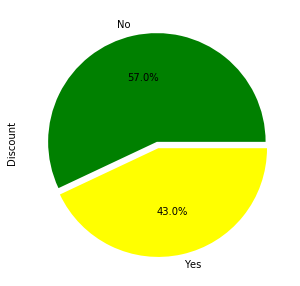

In [88]:
plt.figure(figsize=(20,5))
df_c1['Discount'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.05) ,colors=['green', 'yellow'])
plt.show()

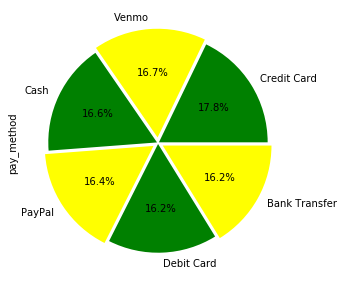

In [89]:
plt.figure(figsize=(20,5))
df_c1['pay_method'].value_counts().plot(kind ='pie',autopct='%0.1f%%', explode =(0.01,0.05,0.01,0.05,0.01,0.05) ,colors=['green', 'yellow'])
plt.show()

# What is the total purchase amount for male & female customers  ?

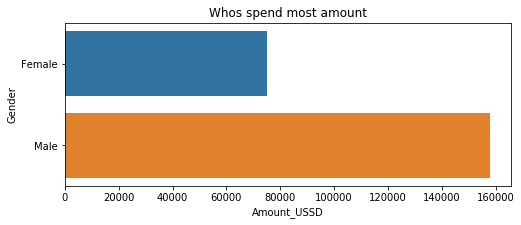

In [90]:
df_c2= df_c1.groupby(['Gender'])['Amount_USSD'].sum()
plt.figure(figsize=(8,3))
sns.barplot(y=df_c2.index,x=df_c2,orient='h')
plt.xlabel('Amount_USSD')
plt.ylabel('Gender')
plt.title('Whos spend most amount')
plt.show()

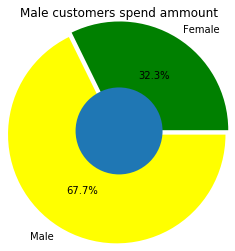

In [127]:
plt.pie(list(df_c2),labels=list(df_c2.keys()),autopct="%0.1f%%",radius=1.25,explode =(0.01,0.05) ,colors=['green', 'yellow'])
plt.pie([1],radius=0.5)
plt.title('Male customers spend ammount')
plt.show()

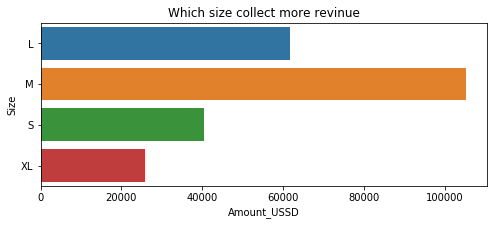

In [126]:
df_si= df_c1.groupby(['Size'])['Amount_USSD'].sum()
plt.figure(figsize=(8,3))
sns.barplot(y=df_si.index,x=df_si.values,orient='h')
plt.xlabel('Amount_USSD')
plt.ylabel('Size')
plt.title('Which size collect more revinue')
plt.show()

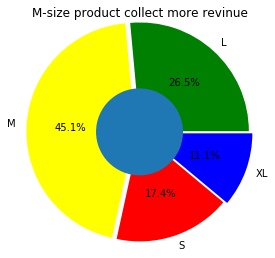

In [125]:
plt.pie(list(df_si), labels=list(df_si.keys()), explode =(0.01,0.05,0.01,0.05) ,colors=['green','yellow','red','blue'], autopct='%0.1f%%',radius=1.25)
plt.pie([1],radius=0.5)
plt.title('M-size product collect more revinue')
plt.show()

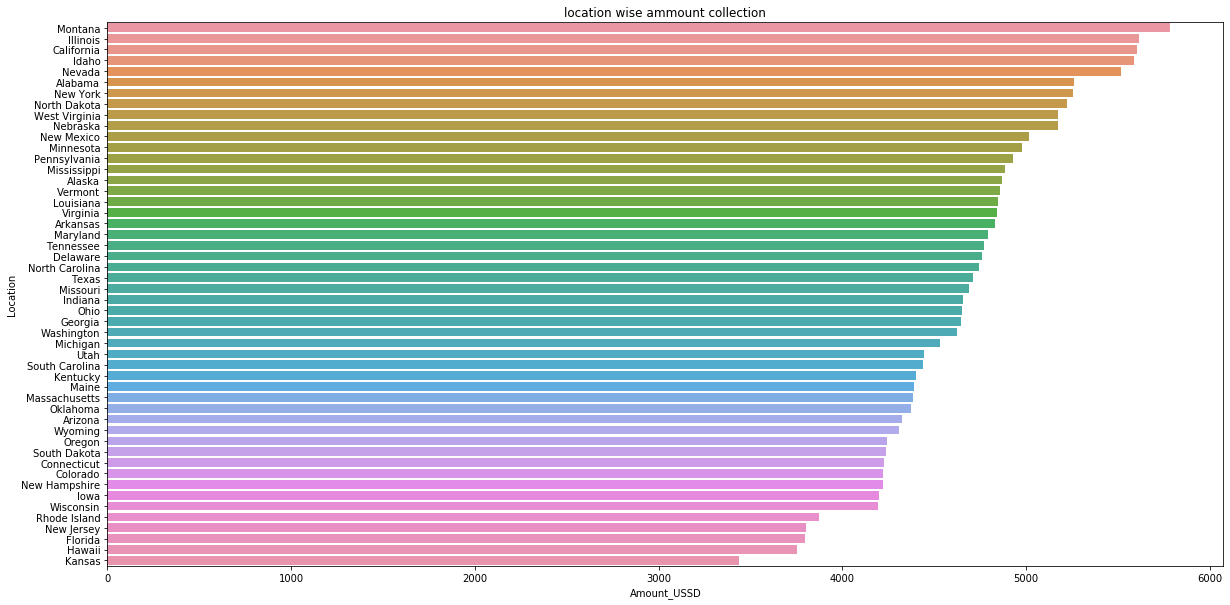

In [118]:
df_c3= df_c1.groupby(['Location'])['Amount_USSD'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(y=df_c3.index,x=df_c3,orient='h')
plt.xlabel('Amount_USSD')
plt.ylabel('Location')
plt.title('location wise ammount collection')
plt.show()

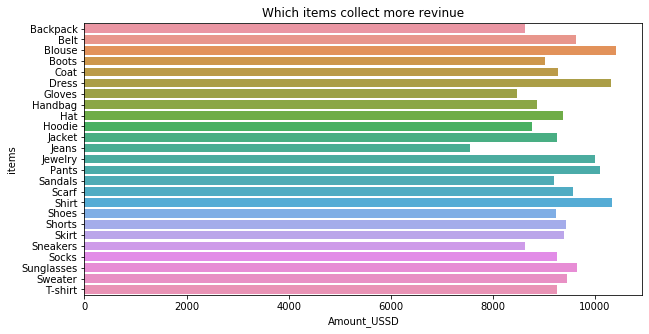

In [130]:
# Which items have high slae price
df_item= df_c1.groupby(['items'])['Amount_USSD'].sum()
plt.figure(figsize=(10,5))
sns.barplot(y=df_item.index,x=df_item.values,orient='h')
plt.xlabel('Amount_USSD')
plt.ylabel('items')
plt.title('Which items collect more revinue')
plt.show()

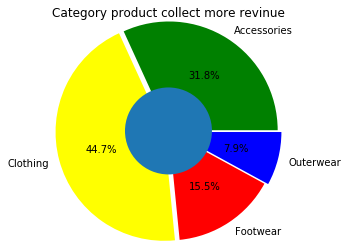

In [139]:
plt.pie(list(df_c1.groupby(['Category'])['Amount_USSD'].sum()), labels=list(df_c1.groupby(['Category'])['Amount_USSD'].sum().keys()), explode =(0.01,0.05,0.01,0.05) ,colors=['green','yellow','red','blue'], autopct='%0.1f%%',radius=1.25)
plt.pie([1],radius=0.5)
plt.title('Category product collect more revinue')
plt.show()

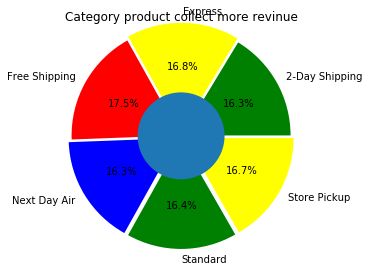

In [142]:
plt.pie(list(df_c1.groupby(['shipping_type'])['Amount_USSD'].sum()), labels=list(df_c1.groupby(['shipping_type'])['Amount_USSD'].sum().keys()), explode =(0.01,0.05,0.01,0.05,0.05,0.05) ,colors=['green','yellow','red','blue'], autopct='%0.1f%%',radius=1.25)
plt.pie([1],radius=0.5)
plt.title('Category product collect more revinue')
plt.show()

### Top 05 cothing items as per sales

In [177]:
cloth_data = df_c1[df_c1['Category']=='Clothing']

In [227]:
cloth_item= cloth_data.groupby(['items'])['Amount_USSD'].sum().sort_values(ascending=False).head().reset_index()
cloth_item

,items,Amount_USSD
0,Blouse,10410
1,Shirt,10332
2,Dress,10320
3,Pants,10090
4,Sweater,9462


### Top 05 accessories items as per sales

In [228]:
acc_data = df_c1[df_c1['Category']=='Accessories']
item_acc =acc_data.groupby(['items'])['Amount_USSD'].sum().sort_values(ascending=False).head().reset_index()
item_acc

,items,Amount_USSD
0,Jewelry,10010
1,Sunglasses,9649
2,Belt,9635
3,Scarf,9561
4,Hat,9375
